FOLD DID NOT CONVERGE

In [2]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
import pickle

In [3]:
# FILE LOCATION OF DATA
project_folder = r'C:\Users\giova\Documents\School\Classes\Spring 2025\Capstone Project\Football2024'
data_folder_loc = r'C:\Users\giova\Documents\School\Classes\Spring 2025\Capstone Project\Data'

folds_file = r'\folds_data.csv'

In [4]:
# READ DATA
folds_df = pd.read_csv(project_folder + folds_file)

In [5]:
folds_df['FAN_PHONE_MARKETABLE1'] = (folds_df['FAN_PHONE_MARKETABLE'] == 1).astype(int)
folds_df['HAS_OPENED_EMAIL1'] = (folds_df['HAS_OPENED_EMAIL'] == 1).astype(int)
folds_df['HAS_DONATED1'] = (folds_df['HAS_DONATED'] == 1).astype(int)
folds_df['HAS_MADE_PURCHASE1'] = (folds_df['HAS_MADE_PURCHASE'] == 1).astype(int)
folds_df['DONATION_CURRENT_DONOR1'] = (folds_df['DONATION_CURRENT_DONOR'] == 1).astype(int)
folds_df['ISRESOLD1'] = (folds_df['ISRESOLD'] == 1).astype(int)
folds_df['TICKETING_CURRENTYEARSTM1'] = (folds_df['TICKETING_CURRENTYEARSTM'] == 1).astype(int)
folds_df['TICKETING_PREVSEASONSTM1'] = (folds_df['TICKETING_PREVSEASONSTM'] == 1).astype(int)
folds_df['FAN_POSTAL_MARKETABLE1'] = (folds_df['FAN_POSTAL_MARKETABLE'] == 1).astype(int)
folds_df['ISRESOLD1'] = (folds_df['ISRESOLD'] == 1).astype(int)

In [6]:
folds_df.head()

,GRMCONTACTID,EVENTNAME,SECTIONNAME,ROWNAME,SEAT,REVENUETOTAL,PLANCODE,ISMOBILE,RESOLDTOTALAMOUNT,ISATTENDED,...,fold,FAN_PHONE_MARKETABLE1,HAS_OPENED_EMAIL1,HAS_DONATED1,HAS_MADE_PURCHASE1,DONATION_CURRENT_DONOR1,ISRESOLD1,TICKETING_CURRENTYEARSTM1,TICKETING_PREVSEASONSTM1,FAN_POSTAL_MARKETABLE1
0,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. TIGERS,11,16,14,60.0,FB24,1,0.0,1,...,1,1,1,1,1,1,0,1,1,1
1,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. REBELS,11,16,15,70.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
2,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. TERRIERS,11,16,16,30.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
3,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. MONARCHS,11,16,14,35.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
4,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. REBELS,11,16,13,70.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1


In [7]:
fold1_train = folds_df[folds_df['fold'] != 1]
fold1_test = folds_df[folds_df['fold'] == 1]

In [8]:
fold2_train = folds_df[folds_df['fold'] != 2]
fold2_test = folds_df[folds_df['fold'] == 2]

In [9]:
fold3_train = folds_df[folds_df['fold'] != 3]
fold3_test = folds_df[folds_df['fold'] == 3]

In [10]:
fold4_train = folds_df[folds_df['fold'] != 4]
fold4_test = folds_df[folds_df['fold'] == 4]

In [11]:
fold5_train = folds_df[folds_df['fold'] != 5]
fold5_test = folds_df[folds_df['fold'] == 5]

In [12]:
import numpy as np

def predict_probability3(row):
    score = 2.4962551  # Intercept

    # Individual features
    score += -0.1032278 * row.get('DONATION_CURRENT_DONATION_AMOUNT', 0)
    score += 0.3785299 * row.get('FAN_PHONE_MARKETABLE1', 0)
    score += -0.6537580 * row.get('TICKETING_CURRENTYEARSTM1', 0)
    score += 0.0910863 * row.get('TICKETING_PREVSEASONSTM1', 0)
    score += 0.1731340 * row.get('DONATION_CURRENT_DONOR1', 0)
    score += 0.0735155 * row.get('HAS_OPENED_EMAIL1', 0)
    score += 0.1250932 * row.get('HAS_DONATED1', 0)
    score += 0.1141194 * row.get('HAS_MADE_PURCHASE1', 0)

    # Seating colors
    seating_coefs = {
        'Blue': 0.0937310,
        'Garnet': 0.1939450,
        'Gray': -0.0765273,
        'Green': -0.0924558,
        'Hot Pink': 0.0054274,
        'Light Blue': 0.8475100,
        'Lime Green': 0.7161841,
        'Other': 0.5571196,
        'Pink': 0.3742032,
        'Purple': 0.6768957,
        'Red': 0.0288406,
        'Tan': 0.8562888,
        'Teal': 0.1225957,
        'White': 1.1714152,
        'Yellow': -0.0149152,
    }
    for color, coef in seating_coefs.items():
        score += coef * row.get(f'SEATING{color}', 0)

    # Lead source (initial)
    score += 0.2590128 * row.get('FAN_INITIAL_LEAD_SOURCEGamecocksMigration', 0)
    score += -0.0287657 * row.get('FAN_INITIAL_LEAD_SOURCESalesforce', 0)
    score += 0.0833752 * row.get('FAN_INITIAL_LEAD_SOURCESFMC', 0)
    score += 0.3128784 * row.get('FAN_INITIAL_LEAD_SOURCETicketmaster', 0)

    # Lead source (last)
    score += -0.1083797 * row.get('FAN_LAST_LEAD_SOURCEGamecocksMigration', 0)
    score += 0.2069286 * row.get('FAN_LAST_LEAD_SOURCESalesforce', 0)
    score += -0.0724268 * row.get('FAN_LAST_LEAD_SOURCESFMC', 0)
    score += -0.1173351 * row.get('FAN_LAST_LEAD_SOURCETicketmaster', 0)

    # Other categorical / binary variables
    score += 0.0920300 * row.get('FAN_POSTAL_MARKETABLE1', 0)
    score += 0.5375925 * row.get('ISRESOLD1', 0)

    # Event names
    score += -0.7466835 * row.get('EVENTNAMEVS. MONARCHS', 0)
    score += -0.1161859 * row.get('EVENTNAMEVS. REBELS', 0)
    score += -0.7367314 * row.get('EVENTNAMEVS. TERRIERS', 0)
    score += -0.1076230 * row.get('EVENTNAMEVS. TIGERS', 0)
    score += -0.6905215 * row.get('EVENTNAMEVS. ZIPS', 0)

    # Plan codes
    score += -0.1869024 * row.get('PLANCODEFB24-1', 0)
    score += -1.4511025 * row.get('PLANCODEGCFREE25', 0)
    score += -0.2464986 * row.get('PLANCODEUnknown/Not Specified', 0)

    # Continuous ticketing and revenue features
    score += -0.7024274 * row.get('TICKETING_TICKETS_SCANNED', 0)
    score += 0.2779163 * row.get('TICKETING_TICKET_TOTAL_SPEND', 0)
    score += -0.0715495 * row.get('TICKETING_STM_TENURE', 0)
    score += 0.2056004 * row.get('TICKETING_GAMES_SOLD_SECONDARY', 0)
    score += 0.7085168 * row.get('TICKETING_GAMES_SCANNED', 0)
    score += 0.0134118 * row.get('TICKETING_GAMES_PURCHASED_SECONDARY', 0)
    score += 1.2473760 * row.get('TICKETING_ATTENDANCE_SEASON_PCT', 0)
    score += -0.0408026 * row.get('TICKETING_ATTENDANCE_LIFETIME_PCT', 0)
    score += 0.0945495 * row.get('REVENUETOTAL', 0)
    score += 0.0167382 * row.get('RESOLDTOTALAMOUNT', 0)

    # Merchandise features
    score += -0.0383855 * row.get('MERCH_TOTALSPENT_LIFETIME', 0)
    score += 0.0137206 * row.get('MERCH_TOTALSPENT_90DAYS', 0)
    score += -0.0592727 * row.get('MERCH_TOTALSPENT_365DAYS', 0)
    score += 0.0263672 * row.get('MERCH_TOTALSPENT_30DAYS', 0)

    score += 0.0078800 * row.get('FAN_UNIQUE_SOURCESYSTEM_COUNT', 0)
    score += -0.1585042 * row.get('ENGAGEMENT', 0)
    score += 0.0631214 * row.get('EMAIL_EMAIL_OPEN_PCT', 0)
    score += -0.0002666 * row.get('EMAIL_EMAIL_OPEN_COUNT', 0)
    score += 0.3674887 * row.get('EMAIL_EMAIL_CLICK_PCT', 0)
    score += -0.0134597 * row.get('DONATION_TOTAL_DONATION_AMOUNT', 0)
    score += -0.0305291 * row.get('DONATION_MAX_DONATION_AMOUNT', 0)
    
    # Final prediction using sigmoid
    prob = 1 / (1 + np.exp(-score))
    return prob

In [13]:
# Updated normalization info with new means and standard deviations
normalize_info = {
    'REVENUETOTAL': (52.21681, 27.68532),
    'RESOLDTOTALAMOUNT': (7.774847, 37.26325),
    'TICKETING_STM_TENURE': (6.629178, 6.707811),
    'TICKETING_GAMES_SCANNED': (73.04924, 261.2808),
    'TICKETING_TICKETS_SCANNED': (745.2811, 3305.272),
    'TICKETING_GAMES_SOLD_SECONDARY': (3.837306, 18.37318),
    'TICKETING_GAMES_PURCHASED_SECONDARY': (0.5269977, 1.544674),
    'TICKETING_TICKET_TOTAL_SPEND': (301247.2, 705777),
    'DONATION_MAX_DONATION_AMOUNT': (4337.057, 36719.69),
    'DONATION_TOTAL_DONATION_AMOUNT': (69878.01, 346183.8),
    'DONATION_CURRENT_DONATION_AMOUNT': (64976.25, 238955.5),
    'EMAIL_EMAIL_OPEN_COUNT': (361.6561, 380.6699),
    'MERCH_TOTALSPENT_30DAYS': (0.3208162, 6.649214),
    'MERCH_TOTALSPENT_90DAYS': (11.14057, 52.73969),
    'MERCH_TOTALSPENT_365DAYS': (28.95103, 101.9694),
    'MERCH_TOTALSPENT_LIFETIME': (119.5927, 326.8956),
    'EMAIL_OPEN_TIME_DIFF': (0.04985863, 6.216986),
    'DAYS_SINCE_LAST_DONATION': (171.4835, 515.9593),
    'DAYS_SINCE_LAST_PURCHASE': (188.0147, 399.1311)
}

# Normalize each column
for col, (mean, std) in normalize_info.items():
    fold3_train.loc[:, col] = ((fold3_train[col].astype(float) - mean) / std)

C:\Users\giova\AppData\Local\Temp\ipykernel_19836\752452514.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.39195767 -0.39195767 -0.39195767 ...  0.20436205  0.20436205
  0.20436205]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fold3_train.loc[:, col] = ((fold3_train[col].astype(float) - mean) / std)
C:\Users\giova\AppData\Local\Temp\ipykernel_19836\752452514.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.18007156 -0.18007156 -0.18007156 ... -0.13414396 -0.13414396
 -0.13414396]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fold3_train.loc[:, col] = ((fold3_train[col].astype(float) - mean) / std)
C:\Users\giova\AppData\Local\Temp\ipykernel_19836\752452514.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will r

In [14]:
fold3_train.loc[:, 'predicted_prob'] = fold3_train.apply(predict_probability3, axis=1)

C:\Users\giova\AppData\Local\Temp\ipykernel_19836\21486251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold3_train.loc[:, 'predicted_prob'] = fold3_train.apply(predict_probability3, axis=1)


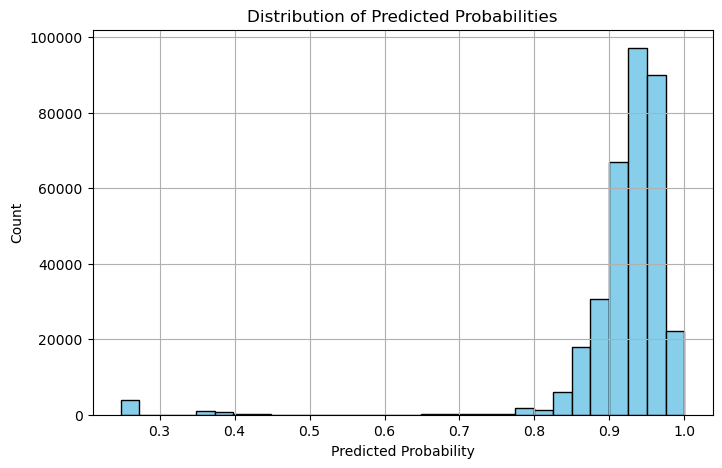

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fold3_train['predicted_prob'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

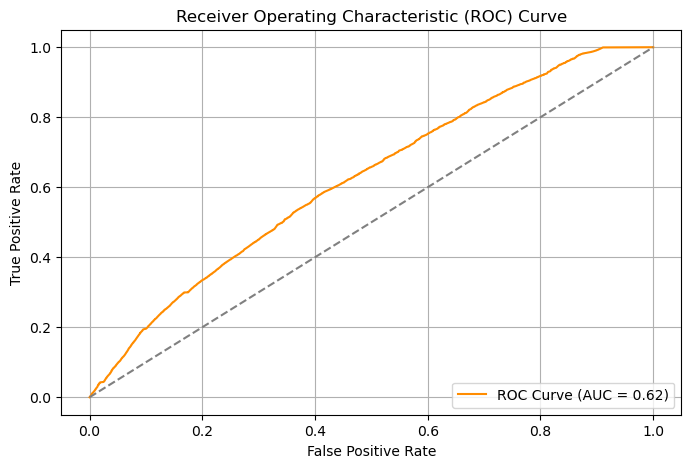

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# True labels and predicted probabilities
y_true = fold3_train['ISATTENDED']
y_scores = fold3_train['predicted_prob']

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute AUC
auc = roc_auc_score(y_true, y_scores)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [17]:
# Youden's J statistic
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best threshold based on Youden's J: {best_threshold:.4f}")

Best threshold based on Youden's J: 0.9320


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Create binary predictions
threshold = 0.8
fold3_train['predicted_label'] = (fold3_train['predicted_prob'] >= threshold).astype(int)

# Step 2: Get confusion matrix
cm = confusion_matrix(fold3_train['ISATTENDED'], fold3_train['predicted_label'])
cm

C:\Users\giova\AppData\Local\Temp\ipykernel_19836\3524784616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold3_train['predicted_label'] = (fold3_train['predicted_prob'] >= threshold).astype(int)


array([[  4830,  38338],
       [  4216, 293219]], dtype=int64)

In [19]:
accuracy_score(fold3_train['ISATTENDED'], fold3_train['predicted_label'])

0.875062756346832

In [20]:
fold3_test.loc[:, 'predicted_prob'] = fold3_test.apply(predict_probability3, axis=1)

C:\Users\giova\AppData\Local\Temp\ipykernel_19836\2215761154.py:92: RuntimeWarning: overflow encountered in exp
  prob = 1 / (1 + np.exp(-score))
C:\Users\giova\AppData\Local\Temp\ipykernel_19836\4271686238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold3_test.loc[:, 'predicted_prob'] = fold3_test.apply(predict_probability3, axis=1)


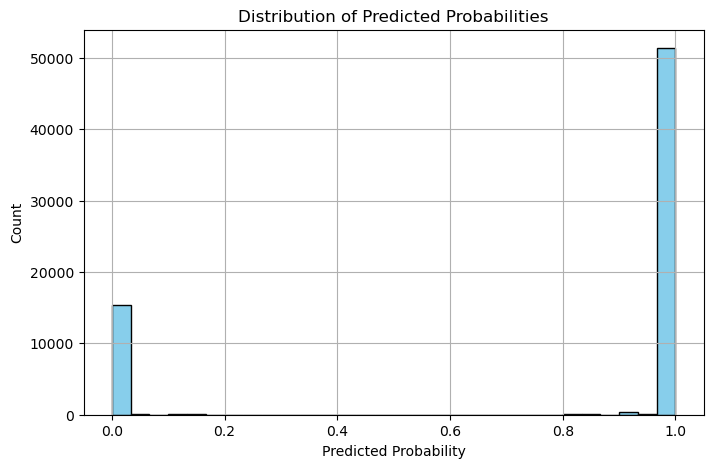

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fold3_test['predicted_prob'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [22]:
fold3_test['predicted_label'] = (fold3_test['predicted_prob'] >= threshold).astype(int)

# Step 2: Get confusion matrix
cm = confusion_matrix(fold3_test['ISATTENDED'], fold3_test['predicted_label'])
cm

C:\Users\giova\AppData\Local\Temp\ipykernel_19836\509598917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold3_test['predicted_label'] = (fold3_test['predicted_prob'] >= threshold).astype(int)


array([[ 2578,  6211],
       [13214, 45729]], dtype=int64)

In [23]:
accuracy_score(fold3_test['ISATTENDED'], fold3_test['predicted_label'])

0.7132079371641175